# Deep Learning

## Course Project - FM [Date: July 2021]

### Required Tasks:
1.	Main objective of the analysis that also specifies whether your model will be focused on a specific type of Deep Learning or Reinforcement Learning algorithm and the benefits that your analysis brings to the business or stakeholders of this data.
2.	Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.
3.	Brief summary of data exploration and actions taken for data cleaning or feature engineering.
4.	Summary of training at least three variations of the Deep Learning model you selected. For example, you can use different clustering techniques or different hyperparameters.
5.	A paragraph explaining which of your Deep Learning models you recommend as a final model that best fits your needs in terms of accuracy or explainability.
6.	Summary Key Findings and Insights, which walks your reader through the main findings of your modeling exercise.
7.	Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model or adding specific data features to achieve a better model.



### 1. Main Objectives

This project is focused on identifying geometric shapes in images using deep Deep Learning approach (Neural Networks). For this purpose a dataset with ~15000 images of 4 geometric shapes is chosen and 3 neural network architectures are implemented.


### 2. DATASET Description

The chosen dataset contains 14,970 black and white images. Each image is 200x200 pixels and depicts one of 4 geomteric shapes:
- square
- star
- circle
- triangle


(The dataset can be downloaded from: https://www.kaggle.com/smeschke/four-shapes/download)


## 3.1. Brief summary of data exploration:
The goal in this section is to better understand the amount and type of information available in the dataset. For this purpose, after importing the needed packages such as numpy, pandas, matplotlib, we will load the dataset and look at a few ample images as well as their attributes.


In [1]:
# importing needed packages
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [4]:

# loading and resizing images
img_size = 28 #size of image fed into model
folders = ['triangle', 'star', 'square', 'circle']
num_classes = 4
labels = []
images = []

for i,folder in enumerate(folders):
    print(folder)
    for file in os.listdir('shapes/'+folder):
        fullpath = 'shapes/{}/{}'.format(folder,file)
        img = cv2.imread(fullpath,0) # Using 0 to read image in grayscale mode
        images.append(cv2.resize(img, (img_size, img_size))) #resizing to 28x28 images
        labels.append(i)


triangle
star
square
circle


In [5]:
#showing number of each class
for i,folder in enumerate(folders):
    print("Number of {}s: {}".format(folder, labels.count(i)))

Number of triangles: 3720
Number of stars: 3765
Number of squares: 3765
Number of circles: 3720


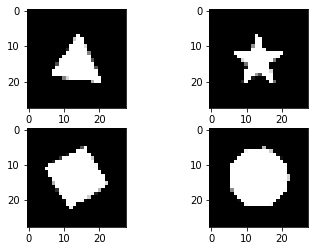

In [6]:
#showing a sample image from each class
fig, axs = plt.subplots(2,2)
axs[0,0].imshow(images[0],cmap='Greys')
axs[0,1].imshow(images[4000],cmap='Greys')
axs[1,0].imshow(images[8000],cmap='Greys')
axs[1,1].imshow(images[12000],cmap='Greys')

### 3.2. Actions taken for data cleaning and feature engineering:
In this section, to make the data ready for further analysis:
- we convert the images to float arrays, and scale and invert values 
- we convert the labels into a 2-dim array by one-hot encoding


In [12]:
# float, scale, invert and flatten images
x = np.array(images) #convert list to numpy array
x = x.astype('float32') #make float
x = x/255.0 #scale to (0,1)
x = 1.0 - x #invert

print(x.shape) #now each image is a 28x28 numpy arraye with values between 0 and 1


(14970, 28, 28)


In [14]:
# setting y variable
y = keras.utils.to_categorical(labels) # one-hot encoding
print(y.shape)

(14970, 4)


### 3.3. Stratified Train-Test Split



In [16]:
# train-test split
from sklearn.model_selection import StratifiedShuffleSplit
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, test_size=0.15, random_state=1)
train_idx, test_idx = next(strat_shuf_split.split(x,y))

x_train, y_train = x[train_idx], y[train_idx]
x_test, y_test = x[test_idx], y[test_idx]


### 4.	Training 3 Neural Networks



In [17]:
### 4.1. Simple Sequential Neural Network without hidden layers
model_1 = Sequential()
model_1.add(Flatten(input_shape = (28,28))) #turn 28x28 into 784x1
model_1.add(Dense(num_classes)) #Decision layer
model_1.add(Activation('softmax'))

In [18]:
# model optimizer
opt = keras.optimizers.RMSprop(lr=0.0005, decay=1e-6)

# model compilation
model_1.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

#model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 4)                 3140      
_________________________________________________________________
activation (Activation)      (None, 4)                 0         
Total params: 3,140
Trainable params: 3,140
Non-trainable params: 0
_________________________________________________________________


In [19]:
# fit model
batch_size = 8
history_1 = model_1.fit(x_train, y_train, batch_size=batch_size, epochs=10, validation_data=(x_test, y_test),shuffle=True)

Epoch 1/10
1591/1591 [==============================] - 2s 1ms/step - loss: 0.3524 - accuracy: 0.9109 - val_loss: 0.1057 - val_accuracy: 0.9915
Epoch 2/10
1591/1591 [==============================] - 2s 1ms/step - loss: 0.0720 - accuracy: 0.9925 - val_loss: 0.0466 - val_accuracy: 0.9964
Epoch 3/10
1591/1591 [==============================] - 2s 1ms/step - loss: 0.0418 - accuracy: 0.9940 - val_loss: 0.0300 - val_accuracy: 0.9951
Epoch 4/10
1591/1591 [==============================] - 2s 1ms/step - loss: 0.0326 - accuracy: 0.9942 - val_loss: 0.0218 - val_accuracy: 0.9964
Epoch 5/10
1591/1591 [==============================] - 2s 1ms/step - loss: 0.0280 - accuracy: 0.9950 - val_loss: 0.0187 - val_accuracy: 0.9964
Epoch 6/10
1591/1591 [==============================] - 2s 1ms/step - loss: 0.0258 - accuracy: 0.9950 - val_loss: 0.0182 - val_accuracy: 0.9955
Epoch 7/10
1591/1591 [==============================] - 2s 1ms/step - loss: 0.0246 - accuracy: 0.9950 - val_loss: 0.0138 - val_accuracy:

final accuracy for model_1: 0.9964


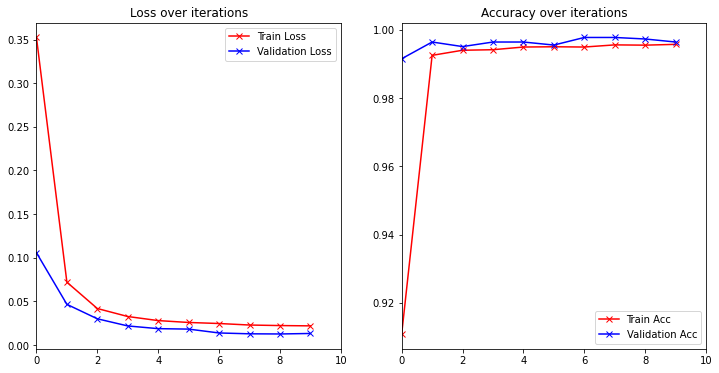

In [20]:
# plot loss/accuracy:
n = len(history_1.history["loss"])
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(n), (history_1.history["loss"]),'r',marker = 'x', label="Train Loss")
ax.plot(range(n), (history_1.history["val_loss"]),'b',marker = 'x', label="Validation Loss")
ax.set_xlim([0,10])
ax.legend()
ax.set_title('Loss over iterations')

ax = fig.add_subplot(1, 2, 2)
ax.plot(range(n), (history_1.history["accuracy"]),'r',marker = 'x', label="Train Acc")
ax.plot(range(n), (history_1.history["val_accuracy"]),'b',marker = 'x', label="Validation Acc")
ax.set_xlim([0,10])
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')

print("final accuracy for model_1: {:.4f}".format(history_1.history["val_accuracy"][-1]))


In [21]:
### 4.2. Sequential Neural Network with hidden layers
model_2 = Sequential()
model_2.add(Flatten(input_shape = (28,28))) #turn 28x28 into 784x1
model_2.add(Dense(64,activation = 'relu')) #hidden layer 1
model_2.add(Dense(16,activation = 'relu')) #hidden layer 1
model_2.add(Dropout(0.5)) #Dropout layer
model_2.add(Dense(num_classes)) #Decision layer
model_2.add(Activation('softmax'))


In [22]:
# model optimizer
opt = keras.optimizers.RMSprop(lr=0.0005, decay=1e-6)

# model compilation
model_2.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

#model summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 68        
_________________________________________________________________
activation_1 (Activation)    (None, 4)                 0         
Total params: 51,348
Trainable params: 51,348
Non-trainable params: 0
__________________________________________________

In [23]:
#fit model
batch_size = 8
history_2 = model_2.fit(x_train, y_train, batch_size=batch_size, epochs=10, validation_data=(x_test, y_test),shuffle=True)

Epoch 1/10
1591/1591 [==============================] - 3s 2ms/step - loss: 0.3563 - accuracy: 0.8475 - val_loss: 0.0156 - val_accuracy: 0.9955
Epoch 2/10
1591/1591 [==============================] - 3s 2ms/step - loss: 0.1466 - accuracy: 0.9300 - val_loss: 0.0048 - val_accuracy: 0.9987
Epoch 3/10
1591/1591 [==============================] - 3s 2ms/step - loss: 0.1078 - accuracy: 0.9455 - val_loss: 7.4459e-04 - val_accuracy: 1.0000
Epoch 4/10
1591/1591 [==============================] - 3s 2ms/step - loss: 0.0888 - accuracy: 0.9558 - val_loss: 9.3889e-04 - val_accuracy: 1.0000
Epoch 5/10
1591/1591 [==============================] - 3s 2ms/step - loss: 0.0846 - accuracy: 0.9583 - val_loss: 0.0013 - val_accuracy: 0.9996
Epoch 6/10
1591/1591 [==============================] - 2s 2ms/step - loss: 0.0816 - accuracy: 0.9609 - val_loss: 0.0038 - val_accuracy: 0.9987
Epoch 7/10
1591/1591 [==============================] - 2s 2ms/step - loss: 0.0849 - accuracy: 0.9609 - val_loss: 2.9382e-04 - v

final accuracy for model_2: 0.9991


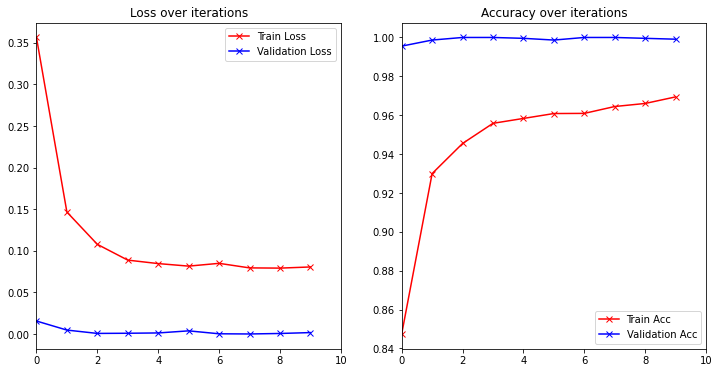

In [24]:
# plot loss/accuracy:
n = len(history_2.history["loss"])
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(n), (history_2.history["loss"]),'r',marker = 'x', label="Train Loss")
ax.plot(range(n), (history_2.history["val_loss"]),'b',marker = 'x', label="Validation Loss")
ax.set_xlim([0,10])
ax.legend()
ax.set_title('Loss over iterations')

ax = fig.add_subplot(1, 2, 2)
ax.plot(range(n), (history_2.history["accuracy"]),'r',marker = 'x', label="Train Acc")
ax.plot(range(n), (history_2.history["val_accuracy"]),'b',marker = 'x', label="Validation Acc")
ax.set_xlim([0,10])
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')

print("final accuracy for model_2: {:.4f}".format(history_2.history["val_accuracy"][-1]))

In [25]:
### 4.3. Sequential Convolutional Neural Network
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

model_3 = Sequential()
model_3.add(Conv2D(28, (3, 3), strides = (2,2), padding='valid', input_shape=x_train.shape[1:]))
model_3.add(Activation('relu'))

model_3.add(MaxPooling2D(pool_size=(2,2)))
model_3.add(Dropout(0.5))

model_3.add(Flatten())
model_3.add(Dense(num_classes))
model_3.add(Activation('softmax'))


In [26]:
# model optimizer
opt = keras.optimizers.RMSprop(lr=0.0005, decay=1e-6)

# model compilation
model_3.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

#model summary
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 13, 13, 28)        280       
_________________________________________________________________
activation_2 (Activation)    (None, 13, 13, 28)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 28)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 28)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1008)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 4036      
_________________________________________________________________
activation_3 (Activation)    (None, 4)                

In [27]:
# fit model
batch_size = 8
history_3 = model_3.fit(x_train, y_train, batch_size=batch_size, epochs=10, validation_data=(x_test, y_test),shuffle=True)

Epoch 1/10
1591/1591 [==============================] - 4s 3ms/step - loss: 0.4356 - accuracy: 0.8618 - val_loss: 0.1052 - val_accuracy: 0.9862
Epoch 2/10
1591/1591 [==============================] - 4s 3ms/step - loss: 0.0932 - accuracy: 0.9764 - val_loss: 0.0339 - val_accuracy: 0.9924
Epoch 3/10
1591/1591 [==============================] - 4s 3ms/step - loss: 0.0530 - accuracy: 0.9870 - val_loss: 0.0162 - val_accuracy: 0.9978
Epoch 4/10
1591/1591 [==============================] - 4s 2ms/step - loss: 0.0386 - accuracy: 0.9895 - val_loss: 0.0115 - val_accuracy: 0.9987
Epoch 5/10
1591/1591 [==============================] - 4s 3ms/step - loss: 0.0339 - accuracy: 0.9906 - val_loss: 0.0089 - val_accuracy: 0.9978
Epoch 6/10
1591/1591 [==============================] - 4s 2ms/step - loss: 0.0293 - accuracy: 0.9926 - val_loss: 0.0076 - val_accuracy: 0.9982
Epoch 7/10
1591/1591 [==============================] - 3s 2ms/step - loss: 0.0269 - accuracy: 0.9932 - val_loss: 0.0087 - val_accuracy:

final accuracy for model_3: 0.9987


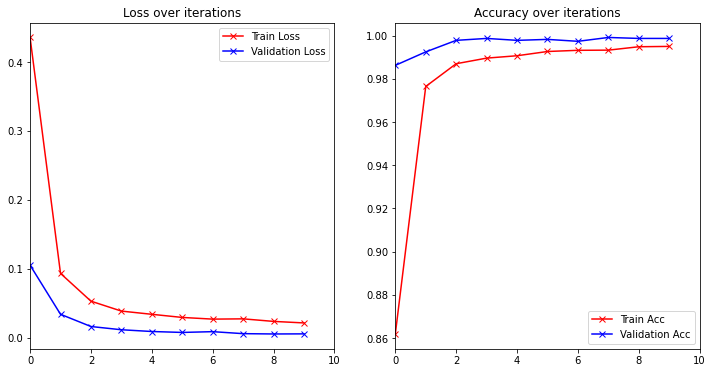

In [28]:
# plot loss/accuracy:
n = len(history_3.history["loss"])
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(n), (history_3.history["loss"]),'r',marker = 'x', label="Train Loss")
ax.plot(range(n), (history_3.history["val_loss"]),'b',marker = 'x', label="Validation Loss")
ax.set_xlim([0,10])
ax.legend()
ax.set_title('Loss over iterations')

ax = fig.add_subplot(1, 2, 2)
ax.plot(range(n), (history_3.history["accuracy"]),'r',marker = 'x', label="Train Acc")
ax.plot(range(n), (history_3.history["val_accuracy"]),'b',marker = 'x', label="Validation Acc")
ax.set_xlim([0,10])
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')

print("final accuracy for model_3: {:.4f}".format(history_3.history["val_accuracy"][-1]))


### 5.	Final model recommendation
Comparing the results, all 3 models are doing pretty good job for the given datasets. However, Convolutional Neural Netwroks are proven to be more effeicient for working with images. As such, model 3 is chosen as the best model and for working with similar datasets.


### 6.	Summary Key Findings and Insights
- This project is focused on the identifying geometric shapes.
- The idea includes ~15000 images of 4 different shapes: square, star, circle, and triangle.
- Images needs some pre-processing before using the neural network models: resizing and flattening.
- 3 neural network architectures have been tested:
    1. Simple Sequential Neural Network without hidden layers
    2. Sequential Neural Network with hidden layers
    3. Sequential Convolutional Neural Network
- Convolutional Neural Networks are proven to be more efficinet with images.



### 7.	Suggestions for next steps in analyzing this data:

To further analyze this dataset, the follwoing items can be done:

- Trying different optimizers (instead of rmsprop), and/or different hyperparameters for the optimizers

- Optimizing neural network architectures by:
    + activation fucntions
    + number of layers
    + nodes per layer
    + layer types

- Given the high accuracy of the trained models, it might be possible to further simplify the models (without losing much predictive accuracy). This can result in much less use of computational power and time for training the models. 